In [2]:
import sys
sys.path.append('../')
from fetch_data import data_fetcher
import matplotlib.pyplot as plt
import numpy as np

### Table of Contents
 * [Import Data](#import_data)
     - Data Exploration

 * [Initial Regression Analysis](#linear_regression)
      - Linear Regression
      - RANSAC 
      - Lasso
      - Ridge
      - ElasticBand
 * [Principal Components Analysis](#pca_analysis)
      - Linear Regression
      - RANSAC
      - Lasso
      - Ridge
      - ElasticBand
 * [Transformation Analysis](#dimen_reduc)

#### Import Data
<a id='import_data'></a>

In [3]:
## Data with no manipulation
wlm_data = data_fetcher.fetch_walmart(norm=False,pca=False, n_components=0, n_degrees=1)
X_train, X_test, y_train, y_test = wlm_data
print(len(X_train), len(y_train), len(X_test), len(y_test))

## Normalized data
wlm_data_norm = data_fetcher.fetch_walmart(norm=True,pca=False,n_components=0, n_degrees=1)
X_train_std, X_test_std, y_train_std, y_test_std = wlm_data_norm
print(len(X_train_std), len(y_train_std), len(X_test_std), len(y_test_std))


## Dimensioanlly Reduced data
wlm_data_pca = data_fetcher.fetch_walmart(norm=True,pca=True,n_components=6, n_degrees=1)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = wlm_data_pca
print(len(X_train_pca), len(y_train_pca), len(X_test_pca), len(y_test_pca))

## Of degree 2
wlm_data_2 = data_fetcher.fetch_walmart(norm=True,pca=False,n_components=0, n_degrees=2)
X_train_2, X_test_2, y_train_2, y_test_2 = wlm_data_2
print(len(X_train_2), len(y_train_2), len(X_test_2), len(y_test_2))

## Of degree 3
wlm_data_3 = data_fetcher.fetch_walmart(norm=True,pca=False,n_components=0, n_degrees=3)
X_train_3, X_test_3, y_train_3, y_test_3 = wlm_data_3
print(len(X_train_3), len(y_train_3), len(X_test_3), len(y_test_3))


295099 295099 126471 126471
295099 295099 126471 126471
295099 295099 126471 126471
295099 295099 126471 126471
295099 295099 126471 126471


#### Data Exploration

NOTE: For further EDA, see respective notebooks: 'data_explr_walmart/rossman'.

In [3]:
print(X_train[:10])

        Store  Dept  IsHoliday  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
64010       7    40       True       0.00       0.00       0.00       0.00   
102847     11    37      False       0.00       0.00       0.00       0.00   
140301     15    17      False       0.00       0.00       0.00       0.00   
276046     28    91      False    5977.78       7.91       2.16    2458.50   
152216     16    31       True      90.28     126.47   34754.69      24.64   
338863     35    83      False       0.00       0.00       0.00       0.00   
304741     32     7      False       0.00       0.00       0.00       0.00   
15467       2    38       True   13510.89    6674.42      94.07   14114.90   
144884     15    58      False       0.00       0.00       0.00       0.00   
355175     38    11      False       0.00       0.00       0.00       0.00   

        MarkDown5    Size  Week  Year  WeekOfYear  
64010        0.00   70713     6  2010         6.0  
102847       0.00  207499    34  2011

## Initial Regression Analysis

<a id='linear_regression'></a>

#### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import time

## NO MANIP
lr = LinearRegression()
st = time.time()
lr.fit(X_train, y_train)
en = time.time()
fit_time = (en-st)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

## STANDARDIZED 
lr = LinearRegression()
st = time.time()
lr.fit(X_train_std, y_train_std)
en = time.time()
fit_time_std = (en-st)

pred_train_std = lr.predict(X_train_std)
pred_test_std = lr.predict(X_test_std)


## R2
r2_train_lr = r2_score(y_train, pred_train)
r2_test_lr = r2_score(y_test, pred_test)

r2_train_std_lr = r2_score(y_train_std, pred_train_std)
r2_test_std_lr = r2_score(y_test_std, pred_test_std)

## TIME
print('Fit Times:\n--------------------\n')
print('Fit Time:       ', fit_time)
print('Fit Time (STD): ', fit_time_std)

print("\nR2 Scores\n---------------------\n")
print("R2 (train) for %s:             %0.5f%% " % ('LR', r2_train_lr))
print("R2 (test) for %s:              %0.5f%% " % ('LR', r2_test_lr))
print("R2 (train - STD) for %s:       %0.5f%% " % ('LR', r2_train_std_lr))
print("R2 (test - STD) for %s:        %0.5f%% \n\n" % ('LR', r2_test_std_lr))

## MSE
mse_train_lr = mean_squared_error(y_train, pred_train)
mse_test_lr = mean_squared_error(y_test, pred_test)
mse_train_std_lr = mean_squared_error(y_train_std, pred_train_std)
mse_test_std_lr = mean_squared_error(y_test_std, pred_test_std)

print("MSE Scores\n---------------------\n")
print("MSE (train) for %s:              %0.5f%% " % ('LR', mse_train_lr))
print("MSE (test) for %s:               %0.5f%% " % ('LR', mse_test_lr))
print("MSE (train - STD) for %s:        %0.5f%% " % ('LR', mse_train_std_lr))
print("MSE (test - STD) for %s:         %0.5f%% " % ('LR', mse_test_std_lr))
print('\n')

Fit Times:
--------------------

Fit Time:        0.13574910163879395
Fit Time (STD):  0.17637944221496582

R2 Scores
---------------------

R2 (train) for LR:             0.08507% 
R2 (test) for LR:              0.08605% 
R2 (train - STD) for LR:       0.08507% 
R2 (test - STD) for LR:        0.08605% 


MSE Scores
---------------------

MSE (train) for LR:              470713462.71219% 
MSE (test) for LR:               474215196.00033% 
MSE (train - STD) for LR:        470713483.54423% 
MSE (test - STD) for LR:         474215197.94420% 




#### RANSAC

In [10]:
from sklearn.linear_model import RANSACRegressor

## NO MANIP
lr = RANSACRegressor()
st = time.time()
lr.fit(X_train, y_train)
en = time.time()
fit_time = (en-st)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

## STANDARDIZED 
lr = RANSACRegressor()
st = time.time()
lr.fit(X_train_std, y_train_std)
en = time.time()
fit_time_std = (en-st)

pred_train_std = lr.predict(X_train_std)
pred_test_std = lr.predict(X_test_std)


## R2
r2_train_ran = r2_score(y_train, pred_train)
r2_test_ran = r2_score(y_test, pred_test)

r2_train_std_ran = r2_score(y_train_std, pred_train_std)
r2_test_std_ran = r2_score(y_test_std, pred_test_std)

## TIME
print('Fit Times:\n--------------------\n')
print('Fit Time:       ', fit_time)
print('Fit Time (STD): ', fit_time_std)

print("\nR2 Scores\n---------------------\n")
print("R2 (train) for %s:              %0.5f%% " % ('RANSAC', r2_train_ran))
print("R2 (test) for %s:               %0.5f%% " % ('RANSAC', r2_test_ran))
print("R2 (train - STD) for %s:        %0.5f%% " % ('RANSAC', r2_train_std_ran))
print("R2 (test - STD) for %s:         %0.5f%% \n\n" % ('RANSAC', r2_test_std_ran))

## MSE
mse_train_ran = mean_squared_error(y_train, pred_train)
mse_test_ran = mean_squared_error(y_test, pred_test)
mse_train_std_ran = mean_squared_error(y_train_std, pred_train_std)
mse_test_std_ran = mean_squared_error(y_test_std, pred_test_std)

print("MSE Scores\n---------------------\n")
print("MSE (train) for %s:             %0.5f%% " % ('RANSAC', mse_train_ran))
print("MSE (test) for %s:              %0.5f%% " % ('RANSAC', mse_test_ran))
print("MSE (train - STD) for %s:       %0.5f%% " % ('RANSAC', mse_train_std_ran))
print("MSE (test - STD) for %s:        %0.5f%% " % ('RANSAC', mse_test_std_ran))

Fit Times:
--------------------

Fit Time:        1.0852773189544678
Fit Time (STD):  1.1726093292236328

R2 Scores
---------------------

R2 (train) for RANSAC:              -69.73187% 
R2 (test) for RANSAC:               -64.69560% 
R2 (train - STD) for RANSAC:        -1.16311% 
R2 (test - STD) for RANSAC:         -1.15759% 


MSE Scores
---------------------

MSE (train) for RANSAC:             36390289305.34769% 
MSE (test) for RANSAC:              34086993496.33945% 
MSE (train - STD) for RANSAC:       1112883514.13663% 
MSE (test - STD) for RANSAC:        1119491730.30403% 


#### LASSO

In [7]:
from sklearn.linear_model import Lasso

## NO MANIP
lr = Lasso(alpha=.1)
st = time.time()
lr.fit(X_train, y_train)
en = time.time()
fit_time = (en-st)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

## STANDARDIZED 
lr = Lasso()
st = time.time()
lr.fit(X_train_std, y_train_std)
en = time.time()
fit_time_std = (en-st)

pred_train_std = lr.predict(X_train_std)
pred_test_std = lr.predict(X_test_std)


## R2
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)

r2_train_std = r2_score(y_train_std, pred_train_std)
r2_test_std = r2_score(y_test_std, pred_test_std)

## TIME
print('Fit Times:\n--------------------\n')
print('Fit Time:       ', fit_time)
print('Fit Time (STD): ', fit_time_std)

print("\nR2 Scores\n---------------------\n")
print("R2 (train) for %s:          %0.5f%% " % ('LR', r2_train))
print("R2 (test) for %s:           %0.5f%% " % ('LR', r2_test))
print("R2 (train - STD) for %s:    %0.5f%% " % ('LR', r2_train_std))
print("R2 (test - STD) for %s:     %0.5f%% \n\n" % ('LR', r2_test_std))

## MSE
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
mse_train_std = mean_squared_error(y_train_std, pred_train_std)
mse_test_std = mean_squared_error(y_test_std, pred_test_std)

print("MSE Scores\n---------------------\n")
print("MSE (train) for %s:           %0.5f%% " % ('LR', mse_train))
print("MSE (test) for %s:            %0.5f%% " % ('LR', mse_test))
print("MSE (train - STD) for %s:     %0.5f%% " % ('LR', mse_train_std))
print("MSE (test - STD) for %s:      %0.5f%% " % ('LR', mse_test_std))

Fit Times:
--------------------

Fit Time:        0.5292618274688721
Fit Time (STD):  0.287705659866333

R2 Scores
---------------------

R2 (train) for LR:          0.08507% 
R2 (test) for LR:           0.08605% 
R2 (train - STD) for LR:    0.08507% 
R2 (test - STD) for LR:     0.08605% 


MSE Scores
---------------------

MSE (train) for LR:           470713462.74927% 
MSE (test) for LR:            474215260.90124% 
MSE (train - STD) for LR:     470713471.79318% 
MSE (test - STD) for LR:      474215321.90624% 


#### Ridge

In [8]:
from sklearn.linear_model import Ridge

## NO MANIP
lr = Ridge(alpha=1.0)
st = time.time()
lr.fit(X_train, y_train)
en = time.time()
fit_time = (en-st)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

## STANDARDIZED 
lr = Ridge(alpha=1.0)
st = time.time()
lr.fit(X_train_std, y_train_std)
en = time.time()
fit_time_std = (en-st)

pred_train_std = lr.predict(X_train_std)
pred_test_std = lr.predict(X_test_std)


## R2
r2_train_rid = r2_score(y_train, pred_train)
r2_test_rid = r2_score(y_test, pred_test)

r2_train_std_rid = r2_score(y_train_std, pred_train_std)
r2_test_std_rid = r2_score(y_test_std, pred_test_std)

## TIME
print('Fit Times:\n--------------------\n')
print('Fit Time:       ', fit_time)
print('Fit Time (STD): ', fit_time_std)

print("\nR2 Scores\n---------------------\n")
print("R2 (train) for %s:         %0.5f%% " % ('Ridge', r2_train_rid))
print("R2 (test) for %s:          %0.5f%% " % ('Ridge', r2_test_rid))
print("R2 (train - STD) for %s:   %0.5f%% " % ('Ridge', r2_train_std_rid))
print("R2 (test - STD) for %s:    %0.5f%% \n\n" % ('Ridge', r2_test_std_rid))

## MSE
mse_train_rid = mean_squared_error(y_train, pred_train)
mse_test_rid = mean_squared_error(y_test, pred_test)
mse_train_std_rid = mean_squared_error(y_train_std, pred_train_std)
mse_test_std_rid = mean_squared_error(y_test_std, pred_test_std)

print("MSE Scores\n---------------------\n")
print("MSE (train) for %s:         %0.5f%% " % ('Ridge', mse_train_rid))
print("MSE (test) for %s:          %0.5f%% " % ('Ridge', mse_test_rid))
print("MSE (train - STD) for %s:   %0.5f%% " % ('Ridge', mse_train_std_rid))
print("MSE (test - STD) for %s:    %0.5f%% " % ('Ridge', mse_test_std_rid))

Fit Times:
--------------------

Fit Time:        0.05029034614562988
Fit Time (STD):  0.02300429344177246

R2 Scores
---------------------

R2 (train) for Ridge:         0.08507% 
R2 (test) for Ridge:          0.08605% 
R2 (train - STD) for Ridge:   0.08507% 
R2 (test - STD) for Ridge:    0.08605% 


MSE Scores
---------------------

MSE (train) for Ridge:         470713462.71220% 
MSE (test) for Ridge:          474215196.38182% 
MSE (train - STD) for Ridge:   470713462.71265% 
MSE (test - STD) for Ridge:    474215198.48399% 


#### ElastcNet

In [9]:
from sklearn.linear_model import ElasticNet

## NO MANIP
lr = ElasticNet(alpha=1.0, l1_ratio=0.5)
st = time.time()
lr.fit(X_train, y_train)
en = time.time()
fit_time = (en-st)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

## STANDARDIZED 
lr = ElasticNet(alpha=1.0)
st = time.time()
lr.fit(X_train_std, y_train_std)
en = time.time()
fit_time_std = (en-st)

pred_train_std = lr.predict(X_train_std)
pred_test_std = lr.predict(X_test_std)


## R2
r2_train_eln = r2_score(y_train, pred_train)
r2_test_eln = r2_score(y_test, pred_test)

r2_train_std_eln = r2_score(y_train_std, pred_train_std)
r2_test_std_eln = r2_score(y_test_std, pred_test_std)

## TIME
print('Fit Times:\n--------------------\n')
print('Fit Time:       ', fit_time)
print('Fit Time (STD): ', fit_time_std)

print("\nR2 Scores\n---------------------\n")
print("R2 (train) for %s:            %0.5f%% " % ('ElasticNet', r2_train_eln))
print("R2 (test) for %s:             %0.5f%% " % ('ElasticNet', r2_test_eln))
print("R2 (train - STD) for %s:      %0.5f%% " % ('ElasticNet', r2_train_std_eln))
print("R2 (test - STD) for %s:       %0.5f%% \n\n" % ('ElasticNet', r2_test_std_eln))

## MSE
mse_train_eln = mean_squared_error(y_train, pred_train)
mse_test_eln = mean_squared_error(y_test, pred_test)
mse_train_std_eln = mean_squared_error(y_train_std, pred_train_std)
mse_test_std_eln = mean_squared_error(y_test_std, pred_test_std)

print("MSE Scores\n---------------------\n")
print("MSE (train) for %s:            %0.5f%% " % ('ElasticNet', mse_train_eln))
print("MSE (test) for %s:             %0.5f%% " % ('ElasticNet', mse_test_eln))
print("MSE (train - STD) for %s:      %0.5f%% " % ('ElasticNet', mse_train_std_eln))
print("MSE (test - STD) for %s:       %0.5f%% " % ('ElasticNet', mse_test_std_eln))

c:\Users\brock\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.761e+10, tolerance: 1.518e+10
  model = cd_fast.enet_coordinate_descent(


Fit Times:
--------------------

Fit Time:        10.159334421157837
Fit Time (STD):  0.12572383880615234

R2 Scores
---------------------

R2 (train) for ElasticNet:            0.08504% 
R2 (test) for ElasticNet:             0.08596% 
R2 (train - STD) for ElasticNet:      0.07646% 
R2 (test - STD) for ElasticNet:       0.07697% 


MSE Scores
---------------------

MSE (train) for ElasticNet:            470732828.71944% 
MSE (test) for ElasticNet:             474262019.30285% 
MSE (train - STD) for ElasticNet:      475145300.96488% 
MSE (test - STD) for ElasticNet:       478924080.71016% 


## PCA
<a id='pca_analysis'></a>

Let's look at how R^2 and MSE are affected by Principal Components Analysis.

For each dataset, we will explore all possible values for the hyperparameter 'n_components', from 1 to n-1. (n being the number of features in the respective dataset)

#### Linear Regression

Text(0.5, 1.0, 'MSE per num of omponenets')

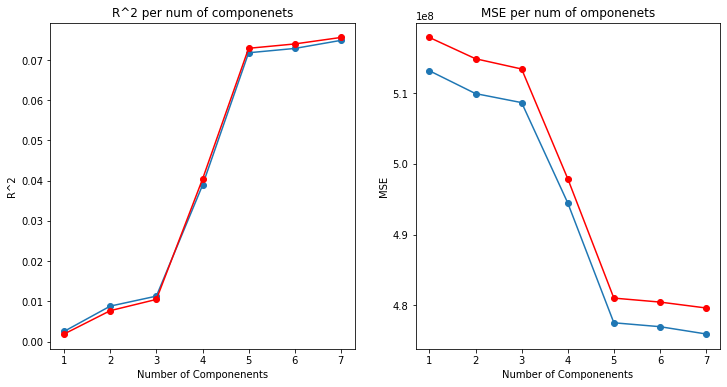

In [9]:


## Walmart
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []


## For each of our features 
for i in range(1,8):
    ## Dimensioanlly Reduced data
    wlm_data_pca = data_fetcher.fetch_walmart(norm=True,pca=True,n_components=i, n_degrees=1)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = wlm_data_pca

    lr = LinearRegression() 
    st = time.time()
    lr.fit(X_train_pca, y_train_pca)
    en = time.time()
    fit_time_pca = (en-st)

    pred_train_pca = lr.predict(X_train_pca)
    pred_test_pca = lr.predict(X_test_pca)

    r2_train_pca = r2_score(y_train_pca, pred_train_pca)
    r2_train.append(r2_train_pca)
    r2_test_pca = r2_score(y_test_pca, pred_test_pca)
    r2_test.append(r2_test_pca)

    mse_train_pca = mean_squared_error(y_train_pca, pred_train_pca)
    mse_train.append(mse_train_pca)
    mse_test_pca = mean_squared_error(y_test_pca, pred_test_pca)
    mse_test.append(mse_test_pca)

    comp_num.append(i)
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Componenents")
ax[0].set_title("R^2 per num of componenets")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Componenents")
ax[1].set_title("MSE per num of omponenets")

#### RANSAC

Slope: 42.380
Intercept : 3950.639
Slope: 300.816
Intercept : 3243.419
Slope: -226.949
Intercept : 4483.616
Slope: 812.992
Intercept : 18163.035
Slope: -364.161
Intercept : 22867.366
Slope: 7794.570
Intercept : 9893.240
Slope: -7171.717
Intercept : -2667.858


Text(0.5, 1.0, 'MSE by number of Componenets')

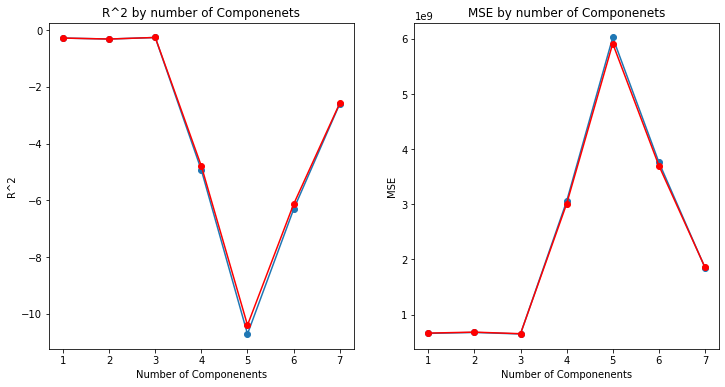

In [10]:

## Walmart
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []

## For each of our features 
for i in range(1,8):
    ## Dimensioanlly Reduced data
    wlm_data_pca = data_fetcher.fetch_walmart(norm=True,pca=True,n_components=i, n_degrees=1)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = wlm_data_pca

    rs = RANSACRegressor() 
    st = time.time()
    rs.fit(X_train_pca, y_train_pca)
    en = time.time()
    fit_time_pca = (en-st)

    print('Slope: %.3f' %rs.estimator_.coef_[0])
    print ('Intercept : %.3f' %rs.estimator_ . intercept_ ) 

    pred_train_pca = rs.predict(X_train_pca)
    pred_test_pca = rs.predict(X_test_pca)

    r2_train_pca = r2_score(y_train_pca, pred_train_pca)
    r2_train.append(r2_train_pca)
    r2_test_pca = r2_score(y_test_pca, pred_test_pca)
    r2_test.append(r2_test_pca)

    mse_train_pca = mean_squared_error(y_train_pca, pred_train_pca)
    mse_train.append(mse_train_pca)
    mse_test_pca = mean_squared_error(y_test_pca, pred_test_pca)
    mse_test.append(mse_test_pca)

    comp_num.append(i)
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Componenents")
ax[0].set_title("R^2 by number of Componenets")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Componenents")
ax[1].set_title("MSE by number of Componenets")

#### Lasso

In [11]:
## Walmart
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []

## For each of our features 
for i in range(1,8):
    ## Dimensioanlly Reduced data
    wlm_data_pca = data_fetcher.fetch_walmart(norm=True,pca=True,n_components=i, n_degrees=1)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = wlm_data_pca

    rs = Lasso() 
    st = time.time()
    rs.fit(X_train_pca, y_train_pca)
    en = time.time()
    fit_time_pca = (en-st)

    pred_train_pca = rs.predict(X_train_pca)
    pred_test_pca = rs.predict(X_test_pca)

    r2_train_pca = r2_score(y_train_pca, pred_train_pca)
    r2_train.append(r2_train_pca)
    r2_test_pca = r2_score(y_test_pca, pred_test_pca)
    r2_test.append(r2_test_pca)

    mse_train_pca = mean_squared_error(y_train_pca, pred_train_pca)
    mse_train.append(mse_train_pca)
    mse_test_pca = mean_squared_error(y_test_pca, pred_test_pca)
    mse_test.append(mse_test_pca)

    comp_num.append(i)
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Componenents")
ax[0].set_title("R^2 by number of Componenets")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Componenents")
ax[1].set_title("MSE by number of Componenets")

KeyboardInterrupt: 

#### Ridge

Text(0.5, 1.0, 'MSE by number of Componenets')

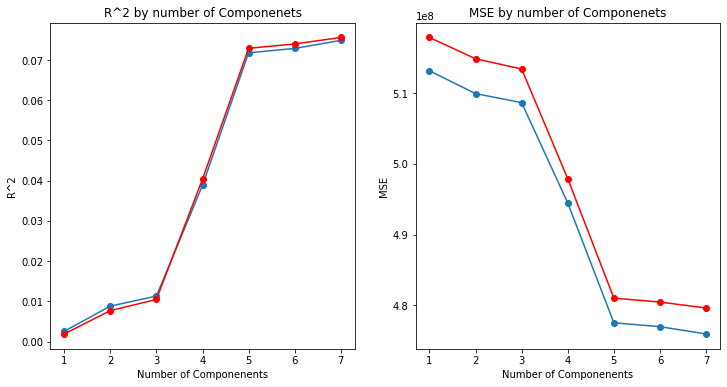

In [ ]:
## Walmart
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []

## For each of our features 
for i in range(1,8):
    ## Dimensioanlly Reduced data
    wlm_data_pca = data_fetcher.fetch_walmart(norm=True,pca=True,n_components=i, n_degrees=1)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = wlm_data_pca

    rs = Ridge(alpha=1.0) 
    st = time.time()
    rs.fit(X_train_pca, y_train_pca)
    en = time.time()
    fit_time_pca = (en-st)

    pred_train_pca = rs.predict(X_train_pca)
    pred_test_pca = rs.predict(X_test_pca)

    r2_train_pca = r2_score(y_train_pca, pred_train_pca)
    r2_train.append(r2_train_pca)
    r2_test_pca = r2_score(y_test_pca, pred_test_pca)
    r2_test.append(r2_test_pca)

    mse_train_pca = mean_squared_error(y_train_pca, pred_train_pca)
    mse_train.append(mse_train_pca)
    mse_test_pca = mean_squared_error(y_test_pca, pred_test_pca)
    mse_test.append(mse_test_pca)

    comp_num.append(i)
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Componenents")
ax[0].set_title("R^2 by number of Componenets")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Componenents")
ax[1].set_title("MSE by number of Componenets")

#### ElasticNet

Text(0.5, 1.0, 'MSE by number of Componenets')

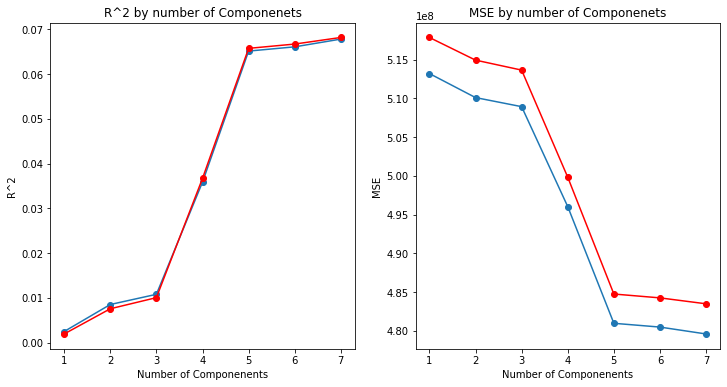

In [ ]:
## Walmart
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []

## For each of our features 
for i in range(1,8):
    ## Dimensioanlly Reduced data
    wlm_data_pca = data_fetcher.fetch_walmart(norm=True,pca=True,n_components=i, n_degrees=1)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = wlm_data_pca

    rs = ElasticNet(alpha=1.0, l1_ratio=0.5) 
    st = time.time()
    rs.fit(X_train_pca, y_train_pca)
    en = time.time()
    fit_time_pca = (en-st)

    pred_train_pca = rs.predict(X_train_pca)
    pred_test_pca = rs.predict(X_test_pca)

    r2_train_pca = r2_score(y_train_pca, pred_train_pca)
    r2_train.append(r2_train_pca)
    r2_test_pca = r2_score(y_test_pca, pred_test_pca)
    r2_test.append(r2_test_pca)

    mse_train_pca = mean_squared_error(y_train_pca, pred_train_pca)
    mse_train.append(mse_train_pca)
    mse_test_pca = mean_squared_error(y_test_pca, pred_test_pca)
    mse_test.append(mse_test_pca)

    comp_num.append(i)
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Componenents")
ax[0].set_title("R^2 by number of Componenets")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Componenents")
ax[1].set_title("MSE by number of Componenets")

## Transformation Analysis
<a id='dimen_reduc'></a>

#### Linear Regression

Text(0.5, 1.0, 'MSE by features')

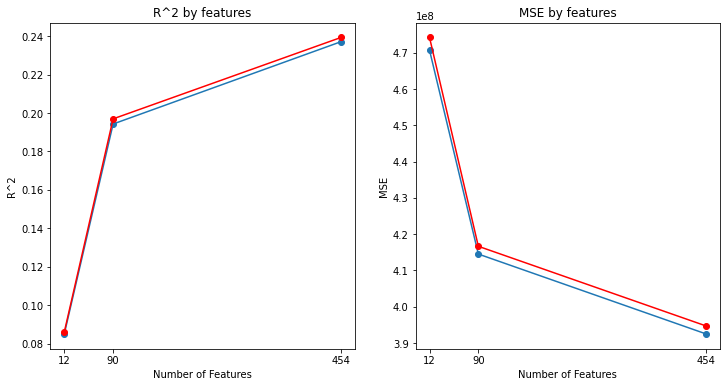

In [ ]:
## Walmart
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []

    ## Dimensioanlly Reduced data
X_train_1, X_test_1, y_train_1, y_test_1 = wlm_data_norm
X_train_2, X_test_2, y_train_2, y_test_2 = wlm_data_2
X_train_3, X_test_3, y_train_3, y_test_3 = wlm_data_3


## DEGREE 1 
lr = LinearRegression() 
lr.fit(X_train_1, y_train_1)

pred_train_1 = lr.predict(X_train_1)
pred_test_1 = lr.predict(X_test_1)

r2_train_1 = r2_score(y_train_1, pred_train_1)
r2_train.append(r2_train_1)
r2_test_1 = r2_score(y_test_1, pred_test_1)
r2_test.append(r2_test_1)

mse_train_1 = mean_squared_error(y_train_1, pred_train_1)
mse_train.append(mse_train_1)
mse_test_1 = mean_squared_error(y_test_1, pred_test_1)
mse_test.append(mse_test_1)

## Append number of features
comp_num.append(X_train_1.shape[1])

## DEGREE 2
lr = LinearRegression() 
lr.fit(X_train_2, y_train_2)

pred_train_2 = lr.predict(X_train_2)
pred_test_2 = lr.predict(X_test_2)

r2_train_2 = r2_score(y_train_2, pred_train_2)
r2_train.append(r2_train_2)
r2_test_2 = r2_score(y_test_2, pred_test_2)
r2_test.append(r2_test_2)

mse_train_2 = mean_squared_error(y_train_2, pred_train_2)
mse_train.append(mse_train_2)
mse_test_2 = mean_squared_error(y_test_2, pred_test_2)
mse_test.append(mse_test_2)

## Append number of features
comp_num.append(X_train_2.shape[1])

## DEGREE 3
lr = LinearRegression() 
lr.fit(X_train_3, y_train_3)

pred_train_3 = lr.predict(X_train_3)
pred_test_3 = lr.predict(X_test_3)

r2_train_3 = r2_score(y_train_3, pred_train_3)
r2_train.append(r2_train_3)
r2_test_3 = r2_score(y_test_3, pred_test_3)
r2_test.append(r2_test_3)

mse_train_3 = mean_squared_error(y_train_3, pred_train_3)
mse_train.append(mse_train_3)
mse_test_3 = mean_squared_error(y_test_3, pred_test_3)
mse_test.append(mse_test_3)

## Append number of features
comp_num.append(X_train_3.shape[1])
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Features")
ax[0].set_title("R^2 by features")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Features")
ax[1].set_title("MSE by features")



#### RANSAC

Text(0.5, 1.0, 'MSE by features')

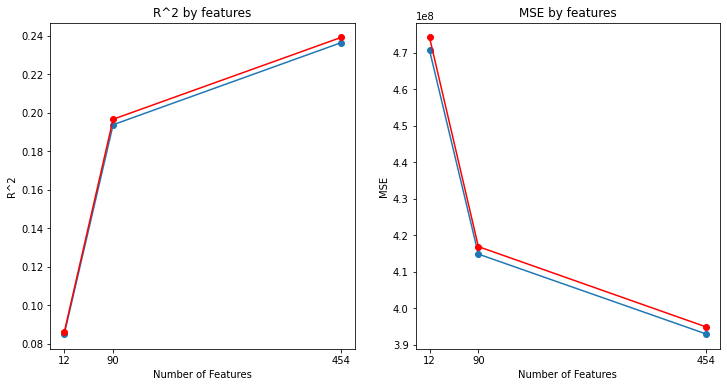

In [ ]:
## Walmart
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []

    ## Dimensioanlly Reduced data
X_train_1, X_test_1, y_train_1, y_test_1 = wlm_data_norm
X_train_2, X_test_2, y_train_2, y_test_2 = wlm_data_2
X_train_3, X_test_3, y_train_3, y_test_3 = wlm_data_3


## DEGREE 1 
rd = Ridge(alpha=1.0) 
rd.fit(X_train_1, y_train_1)

pred_train_1 = rd.predict(X_train_1)
pred_test_1 = rd.predict(X_test_1)

r2_train_1 = r2_score(y_train_1, pred_train_1)
r2_train.append(r2_train_1)
r2_test_1 = r2_score(y_test_1, pred_test_1)
r2_test.append(r2_test_1)

mse_train_1 = mean_squared_error(y_train_1, pred_train_1)
mse_train.append(mse_train_1)
mse_test_1 = mean_squared_error(y_test_1, pred_test_1)
mse_test.append(mse_test_1)

## Append number of features
comp_num.append(X_train_1.shape[1])

## DEGREE 2
rd = Ridge() 
rd.fit(X_train_2, y_train_2)

pred_train_2 = rd.predict(X_train_2)
pred_test_2 = rd.predict(X_test_2)

r2_train_2 = r2_score(y_train_2, pred_train_2)
r2_train.append(r2_train_2)
r2_test_2 = r2_score(y_test_2, pred_test_2)
r2_test.append(r2_test_2)

mse_train_2 = mean_squared_error(y_train_2, pred_train_2)
mse_train.append(mse_train_2)
mse_test_2 = mean_squared_error(y_test_2, pred_test_2)
mse_test.append(mse_test_2)

## Append number of features
comp_num.append(X_train_2.shape[1])

## DEGREE 3
rd = Ridge() 
rd.fit(X_train_3, y_train_3)

pred_train_3 = rd.predict(X_train_3)
pred_test_3 = rd.predict(X_test_3)

r2_train_3 = r2_score(y_train_3, pred_train_3)
r2_train.append(r2_train_3)
r2_test_3 = r2_score(y_test_3, pred_test_3)
r2_test.append(r2_test_3)

mse_train_3 = mean_squared_error(y_train_3, pred_train_3)
mse_train.append(mse_train_3)
mse_test_3 = mean_squared_error(y_test_3, pred_test_3)
mse_test.append(mse_test_3)

## Append number of features
comp_num.append(X_train_3.shape[1])
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Features")
ax[0].set_title("R^2 by features")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Features")
ax[1].set_title("MSE by features")


#### Lasso

c:\Users\brock\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.907e+13, tolerance: 1.518e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\brock\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.350e+13, tolerance: 1.518e+10
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'MSE by features')

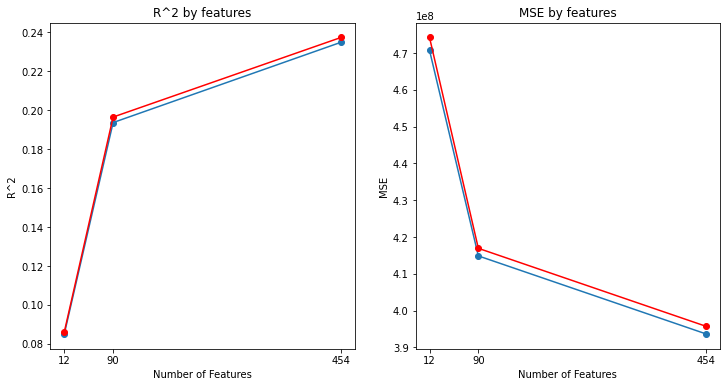

In [11]:
## Walmart
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []

    ## Dimensioanlly Reduced data
X_train_1, X_test_1, y_train_1, y_test_1 = wlm_data_norm
X_train_2, X_test_2, y_train_2, y_test_2 = wlm_data_2
X_train_3, X_test_3, y_train_3, y_test_3 = wlm_data_3


## DEGREE 1 
lr = Lasso(alpha=1.0) 
lr.fit(X_train_1, y_train_1)

pred_train_1 = lr.predict(X_train_1)
pred_test_1 = lr.predict(X_test_1)

r2_train_1 = r2_score(y_train_1, pred_train_1)
r2_train.append(r2_train_1)
r2_test_1 = r2_score(y_test_1, pred_test_1)
r2_test.append(r2_test_1)

mse_train_1 = mean_squared_error(y_train_1, pred_train_1)
mse_train.append(mse_train_1)
mse_test_1 = mean_squared_error(y_test_1, pred_test_1)
mse_test.append(mse_test_1)

## Append number of features
comp_num.append(X_train_1.shape[1])

## DEGREE 2
lr = Lasso(alpha=1.0) 
lr.fit(X_train_2, y_train_2)

pred_train_2 = lr.predict(X_train_2)
pred_test_2 = lr.predict(X_test_2)

r2_train_2 = r2_score(y_train_2, pred_train_2)
r2_train.append(r2_train_2)
r2_test_2 = r2_score(y_test_2, pred_test_2)
r2_test.append(r2_test_2)

mse_train_2 = mean_squared_error(y_train_2, pred_train_2)
mse_train.append(mse_train_2)
mse_test_2 = mean_squared_error(y_test_2, pred_test_2)
mse_test.append(mse_test_2)

## Append number of features
comp_num.append(X_train_2.shape[1])

## DEGREE 3
lr = Lasso(alpha=1.0)
lr.fit(X_train_3, y_train_3)

pred_train_3 = lr.predict(X_train_3)
pred_test_3 = lr.predict(X_test_3)

r2_train_3 = r2_score(y_train_3, pred_train_3)
r2_train.append(r2_train_3)
r2_test_3 = r2_score(y_test_3, pred_test_3)
r2_test.append(r2_test_3)

mse_train_3 = mean_squared_error(y_train_3, pred_train_3)
mse_train.append(mse_train_3)
mse_test_3 = mean_squared_error(y_test_3, pred_test_3)
mse_test.append(mse_test_3)

## Append number of features
comp_num.append(X_train_3.shape[1])
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Features")
ax[0].set_title("R^2 by features")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Features")
ax[1].set_title("MSE by features")


#### Ridge

Text(0.5, 1.0, 'MSE by features')

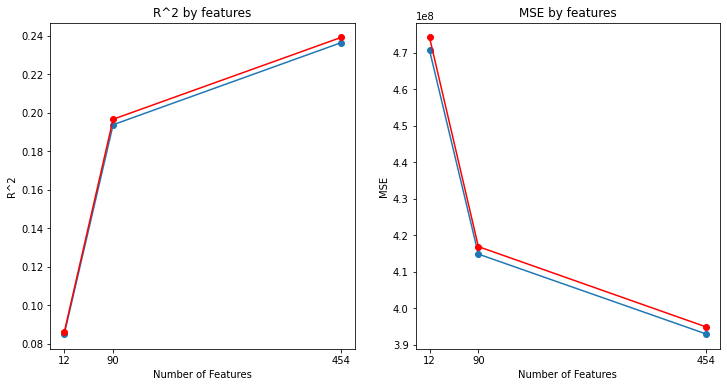

In [12]:
## Walmart
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []

    ## Dimensioanlly Reduced data
X_train_1, X_test_1, y_train_1, y_test_1 = wlm_data_norm
X_train_2, X_test_2, y_train_2, y_test_2 = wlm_data_2
X_train_3, X_test_3, y_train_3, y_test_3 = wlm_data_3


## DEGREE 1 
lr = Ridge(alpha=1.0) 
lr.fit(X_train_1, y_train_1)

pred_train_1 = lr.predict(X_train_1)
pred_test_1 = lr.predict(X_test_1)

r2_train_1 = r2_score(y_train_1, pred_train_1)
r2_train.append(r2_train_1)
r2_test_1 = r2_score(y_test_1, pred_test_1)
r2_test.append(r2_test_1)

mse_train_1 = mean_squared_error(y_train_1, pred_train_1)
mse_train.append(mse_train_1)
mse_test_1 = mean_squared_error(y_test_1, pred_test_1)
mse_test.append(mse_test_1)

## Append number of features
comp_num.append(X_train_1.shape[1])

## DEGREE 2
lr = Ridge(alpha=1.0) 
lr.fit(X_train_2, y_train_2)

pred_train_2 = lr.predict(X_train_2)
pred_test_2 = lr.predict(X_test_2)

r2_train_2 = r2_score(y_train_2, pred_train_2)
r2_train.append(r2_train_2)
r2_test_2 = r2_score(y_test_2, pred_test_2)
r2_test.append(r2_test_2)

mse_train_2 = mean_squared_error(y_train_2, pred_train_2)
mse_train.append(mse_train_2)
mse_test_2 = mean_squared_error(y_test_2, pred_test_2)
mse_test.append(mse_test_2)

## Append number of features
comp_num.append(X_train_2.shape[1])

## DEGREE 3
lr = Ridge(alpha=1.0)
lr.fit(X_train_3, y_train_3)

pred_train_3 = lr.predict(X_train_3)
pred_test_3 = lr.predict(X_test_3)

r2_train_3 = r2_score(y_train_3, pred_train_3)
r2_train.append(r2_train_3)
r2_test_3 = r2_score(y_test_3, pred_test_3)
r2_test.append(r2_test_3)

mse_train_3 = mean_squared_error(y_train_3, pred_train_3)
mse_train.append(mse_train_3)
mse_test_3 = mean_squared_error(y_test_3, pred_test_3)
mse_test.append(mse_test_3)

## Append number of features
comp_num.append(X_train_3.shape[1])
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Features")
ax[0].set_title("R^2 by features")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Features")
ax[1].set_title("MSE by features")

#### ElasticNet

## Combined Metric

c:\Users\brock\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.907e+13, tolerance: 1.518e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\brock\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.350e+13, tolerance: 1.518e+10
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'MSE by features')

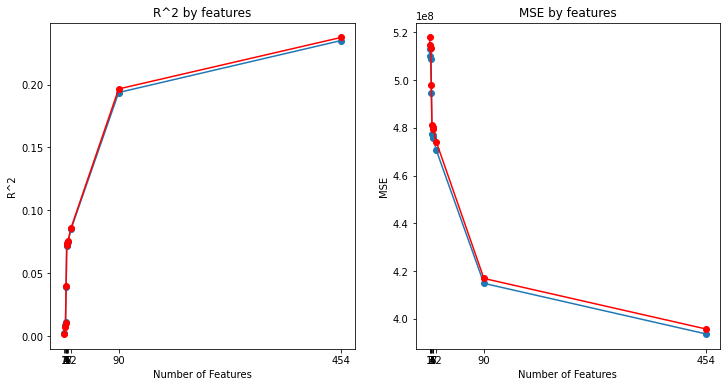

In [13]:
## Walmart
times = []
r2_train = []
r2_test = []
mse_train = []
mse_test = []
comp_num = []

## For each of our features 
for i in range(1,8):
    ## Dimensioanlly Reduced data
    wlm_data_pca = data_fetcher.fetch_walmart(norm=True,pca=True,n_components=i, n_degrees=1)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = wlm_data_pca

    rs = LinearRegression(alpha=1.0) 
    st = time.time()
    rs.fit(X_train_pca, y_train_pca)
    en = time.time()
    fit_time_pca = (en-st)

    pred_train_pca = rs.predict(X_train_pca)
    pred_test_pca = rs.predict(X_test_pca)

    r2_train_pca = r2_score(y_train_pca, pred_train_pca)
    r2_train.append(r2_train_pca)
    r2_test_pca = r2_score(y_test_pca, pred_test_pca)
    r2_test.append(r2_test_pca)

    mse_train_pca = mean_squared_error(y_train_pca, pred_train_pca)
    mse_train.append(mse_train_pca)
    mse_test_pca = mean_squared_error(y_test_pca, pred_test_pca)
    mse_test.append(mse_test_pca)

    comp_num.append(i)

    ## Dimensioanlly Reduced data
X_train_1, X_test_1, y_train_1, y_test_1 = wlm_data_norm
X_train_2, X_test_2, y_train_2, y_test_2 = wlm_data_2
X_train_3, X_test_3, y_train_3, y_test_3 = wlm_data_3

## DEGREE 1 
lr = LinearRegression(alpha=1.0) 
lr.fit(X_train_1, y_train_1)

pred_train_1 = lr.predict(X_train_1)
pred_test_1 = lr.predict(X_test_1)

r2_train_1 = r2_score(y_train_1, pred_train_1)
r2_train.append(r2_train_1)
r2_test_1 = r2_score(y_test_1, pred_test_1)
r2_test.append(r2_test_1)

mse_train_1 = mean_squared_error(y_train_1, pred_train_1)
mse_train.append(mse_train_1)
mse_test_1 = mean_squared_error(y_test_1, pred_test_1)
mse_test.append(mse_test_1)

## Append number of features
comp_num.append(X_train_1.shape[1])

## DEGREE 2
lr = LinearRegression(alpha=1.0) 
lr.fit(X_train_2, y_train_2)

pred_train_2 = lr.predict(X_train_2)
pred_test_2 = lr.predict(X_test_2)

r2_train_2 = r2_score(y_train_2, pred_train_2)
r2_train.append(r2_train_2)
r2_test_2 = r2_score(y_test_2, pred_test_2)
r2_test.append(r2_test_2)

mse_train_2 = mean_squared_error(y_train_2, pred_train_2)
mse_train.append(mse_train_2)
mse_test_2 = mean_squared_error(y_test_2, pred_test_2)
mse_test.append(mse_test_2)

## Append number of features
comp_num.append(X_train_2.shape[1])

## DEGREE 3
lr = LinearRegression(alpha=1.0)
lr.fit(X_train_3, y_train_3)

pred_train_3 = lr.predict(X_train_3)
pred_test_3 = lr.predict(X_test_3)

r2_train_3 = r2_score(y_train_3, pred_train_3)
r2_train.append(r2_train_3)
r2_test_3 = r2_score(y_test_3, pred_test_3)
r2_test.append(r2_test_3)

mse_train_3 = mean_squared_error(y_train_3, pred_train_3)
mse_train.append(mse_train_3)
mse_test_3 = mean_squared_error(y_test_3, pred_test_3)
mse_test.append(mse_test_3)

## Append number of features
comp_num.append(X_train_3.shape[1])
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# plot r2 results
ax[0].plot(comp_num, r2_train, marker='o', label="Training")
ax[0].plot(comp_num, r2_test, marker='o',color='red', label="Testing")
ax[0].set_xticks(comp_num)
ax[0].set_ylabel("R^2")
ax[0].set_xlabel("Number of Features")
ax[0].set_title("R^2 by features")
    
# plot r2 results
ax[1].plot(comp_num, mse_train, marker='o', label="Training")
ax[1].plot(comp_num, mse_test, marker='o',color='red', label="Testing")
ax[1].set_xticks(comp_num)
ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Number of Features")
ax[1].set_title("MSE by features")